In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from toolz import partial
from pathlib import Path
from aging.organization.dataframes import get_age
from aging.plotting import format_plots, figure, legend, add_identity
import colorcet as cc

In [2]:
format_plots()

In [3]:
dotted_identity = partial(add_identity, linestyle='--', color='k')

In [4]:
def age_map_fun(age):
    try:
        return int(age.split("w")[0])
    except ValueError:
        return {"3": 12, "6": 24, "9": 35, "12": 52, "18": 78, "22": 90}[
            age.split("m")[0]
        ]

In [5]:
version = 8
folder = Path(f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}")

In [6]:
def load_usage(path, ontogeny=True):
    df = pd.read_parquet(path)

    if ontogeny:
        df = df[~df["age"].str.contains("Ontogeny")].copy()
        ages = df["age"].unique()
        age_map = {age: age_map_fun(age) for age in ages}
        df["age"] = df["age"].map(age_map)
    else:
        files = df["file"].unique()
        age_map = {age: get_age(Path(age)) for age in files}
        df["age"] = df["file"].map(age_map)

    usages = (
        df.query("onsets")
        .groupby(["age", "uuid"], sort=False)["syllables"]
        .value_counts(normalize=True)
    )

    usages = (
        pd.pivot_table(
            usages.reset_index(),
            values="proportion",
            index=["age", "uuid"],
            columns="syllables",
            fill_value=0,
        )
        .astype("float32")
        .sort_index(level='age')
    )

    return usages

In [6]:
usages = pd.read_parquet(folder / "ontogeny_males_clean_v2.parquet")
female_usages = pd.read_parquet(folder / "ontogeny_females_clean_v2.parquet")

In [7]:
long_usages = pd.read_parquet(folder / "longtogeny_males_clean_v1.parquet").fillna(0).astype('float32')
long_usages

relabeled_syllables                                                                          0   \
age mouse cage uuid                                 subject_name  date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021     2021-03-30 14:49:21  0.001360   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021     2021-03-30 14:52:48  0.006387   
    01_03 01   b29c4d14-3e47-4ab9-8744-fb45862cc03c 01_03_021     2021-03-30 14:52:17  0.012850   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021     2021-03-30 14:50:47  0.001587   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021     2021-03-30 15:32:55  0.000000   
...                                                                                         ...   
831 03_01 03   83aeb5bb-e36d-4db1-8757-65e2fff17b26 long3-0_nt_03 2023-06-18 13:10:36  0.037920   
    03_04 03   8b9025ec-a9c0-4b58-99fc-c77c318f750b long3-1_RL_03 2023-06-18 09:30:22  0.063437   
    04_01 04   bdcb4bd2-949c-405d-903c-3b581df308a3 long4_nt_03   2023-06-18 13:16:38  0.033952   
    04_02 04   baf09b87-e83d-4ccb-a7d0-6b3ef3f9bb27 long4_R_03    2023-06-18 13:16:53  0.090559   
    04_04 04   abe45f28-92ef-49ad-a0d6-41838145812d long4_RL_03   2023-06-18 10:16:22  0.024965   

relabeled_syllables                                                                          1   \
age mouse cage uuid                                 subject_name  date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021     2021-03-30 14:49:21  0.006346   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021     2021-03-30 14:52:48  0.013230   
    01_03 01   b29c4d14-3e47-4ab9-8744-fb45862cc03c 01_03_021     2021-03-30 14:52:17  0.006884   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021     2021-03-30 14:50:47  0.016402   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021     2021-03-30 15:32:55  0.010453   
...                                                                                         ...   
831 03_01 03   83aeb5bb-e36d-4db1-8757-65e2fff17b26 long3-0_nt_03 2023-06-18 13:10:36  0.102141   
    03_04 03   8b9025ec-a9c0-4b58-99fc-c77c318f750b long3-1_RL_03 2023-06-18 09:30:22  0.129758   
    04_01 04   bdcb4bd2-949c-405d-903c-3b581df308a3 long4_nt_03   2023-06-18 13:16:38  0.036074   
    04_02 04   baf09b87-e83d-4ccb-a7d0-6b3ef3f9bb27 long4_R_03    2023-06-18 13:16:53  0.095055   
    04_04 04   abe45f28-92ef-49ad-a0d6-41838145812d long4_RL_03   2023-06-18 10:16:22  0.072122   

relabeled_syllables                                                                          2   \
age mouse cage uuid                                 subject_name  date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021     2021-03-30 14:49:21  0.014959   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021     2021-03-30 14:52:48  0.016880   
    01_03 01   b29c4d14-3e47-4ab9-8744-fb45862cc03c 01_03_021     2021-03-30 14:52:17  0.016980   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021     2021-03-30 14:50:47  0.020635   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021     2021-03-30 15:32:55  0.004978   
...                                                                                         ...   
831 03_01 03   83aeb5bb-e36d-4db1-8757-65e2fff17b26 long3-0_nt_03 2023-06-18 13:10:36  0.037309   
    03_04 03   8b9025ec-a9c0-4b58-99fc-c77c318f750b long3-1_RL_03 2023-06-18 09:30:22  0.040369   
    04_01 04   bdcb4bd2-949c-405d-903c-3b581df308a3 long4_nt_03   2023-06-18 13:16:38  0.077984   
    04_02 04   baf09b87-e83d-4ccb-a7d0-6b3ef3f9bb27 long4_R_03    2023-06-18 13:16:53  0.065511   
    04_04 04   abe45f28-92ef-49ad-a0d6-41838145812d long4_RL_03   2023-06-18 10:16:22  0.059639   

relabeled_syllables                                                                          3   \
age mouse cage uuid                  

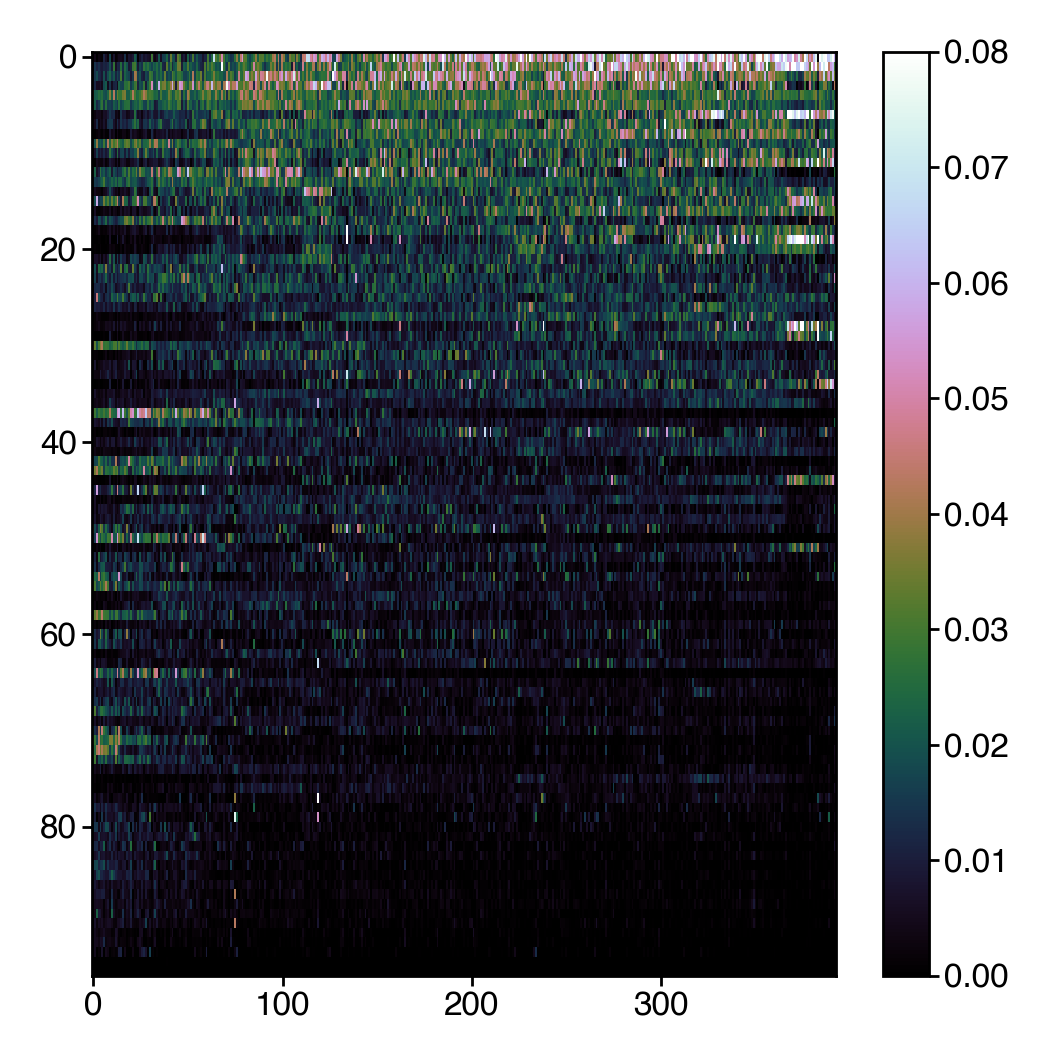

In [9]:
plt.imshow(usages.T, aspect='auto', cmap='cubehelix', vmax=0.08, interpolation='none')
plt.colorbar()

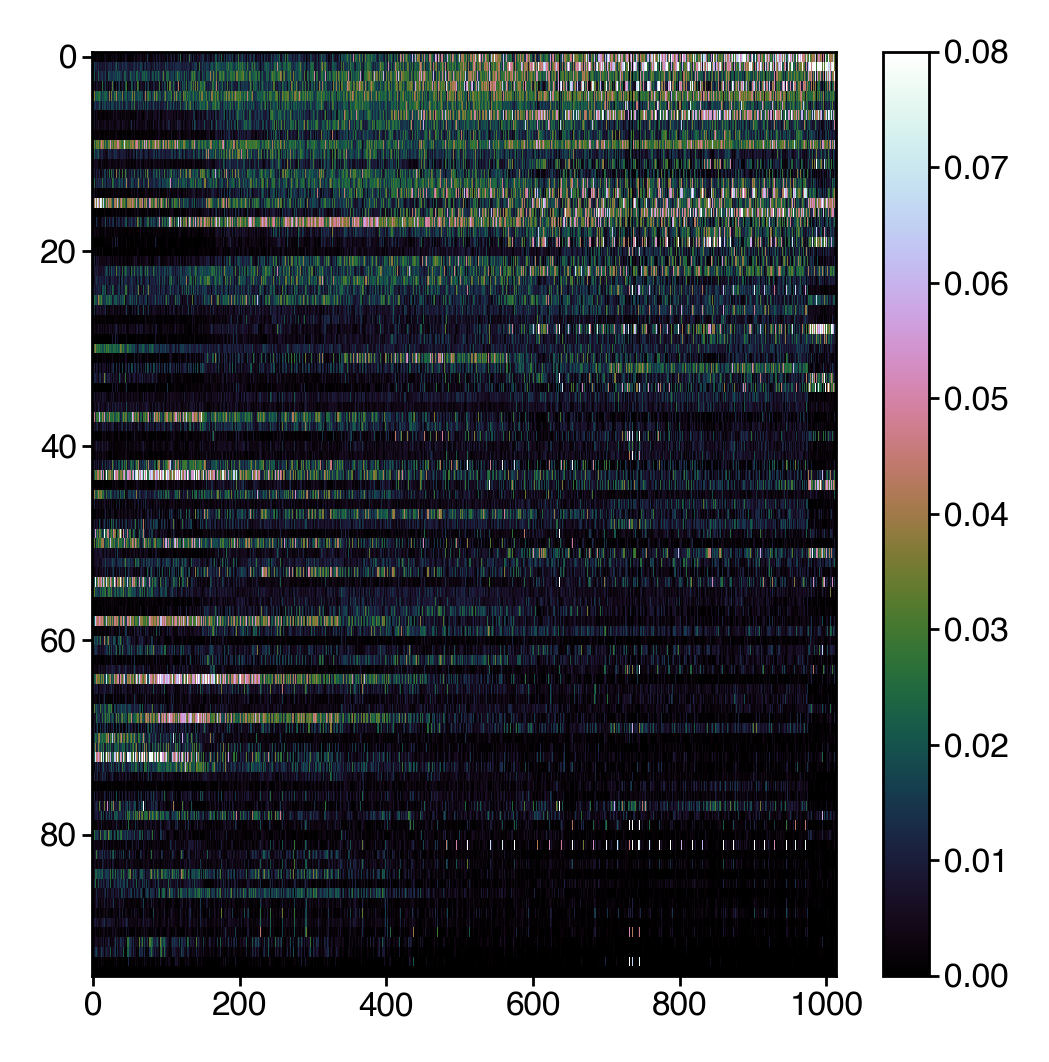

In [10]:
plt.imshow(long_usages.T, aspect='auto', cmap='cubehelix', interpolation='none', vmax=0.08)
plt.colorbar()

<Axes: xlabel='relabeled_syllables', ylabel='value'>

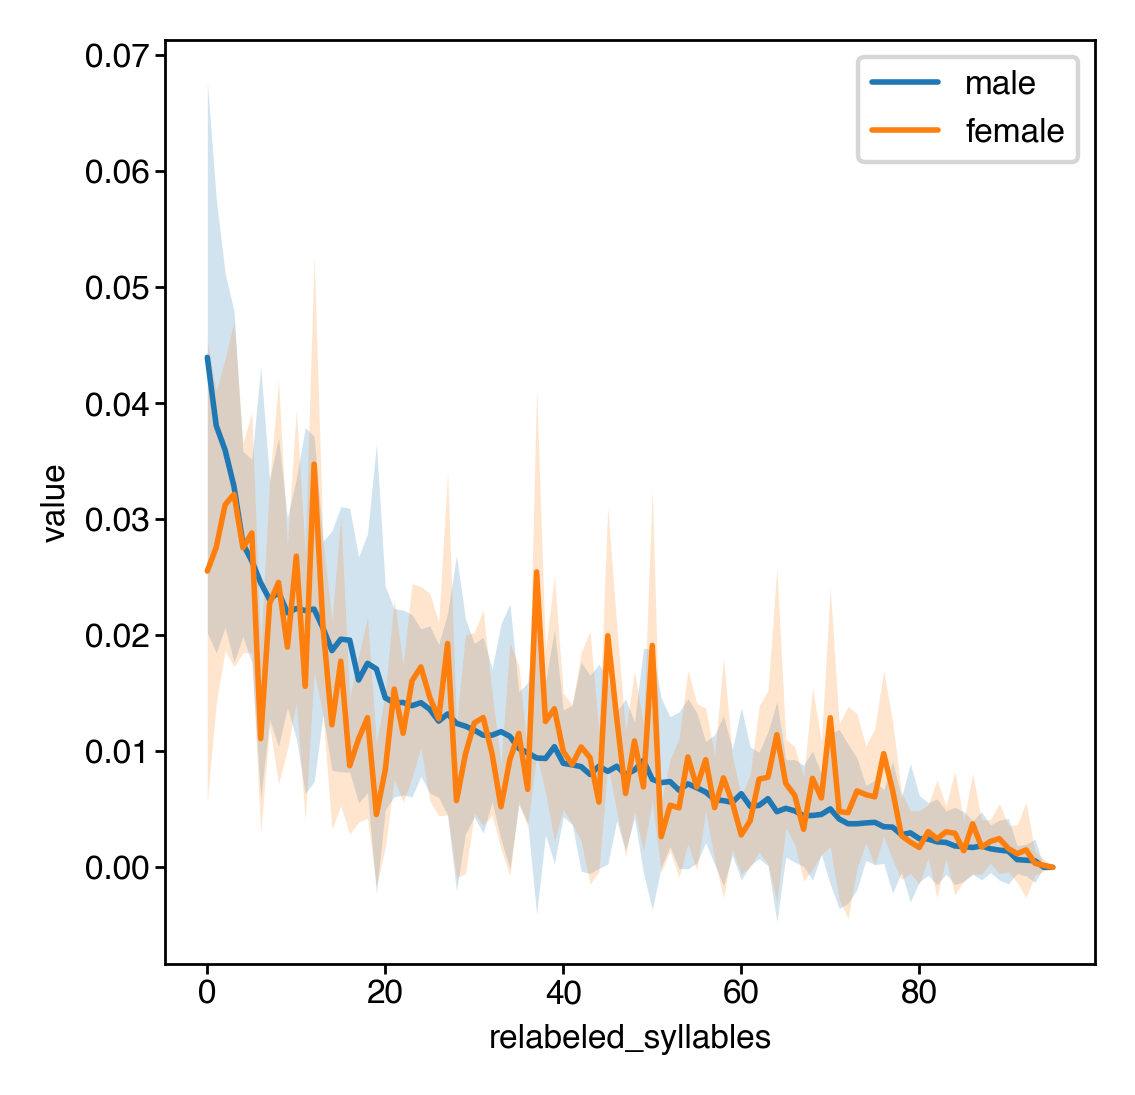

In [11]:
um = usages.melt()
fum = female_usages.melt()
sns.lineplot(
    data=um,
    x="relabeled_syllables",
    y="value",
    errorbar="sd",
    err_kws=dict(lw=0),
    # order=sorted_syllables[::-1],
    label="male",
)
sns.lineplot(
    data=fum,
    x="relabeled_syllables",
    y="value",
    errorbar="sd",
    err_kws=dict(lw=0),
    # order=sorted_syllables[::-1],
    label="female",
)

<Axes: xlabel='relabeled_syllables', ylabel='value'>

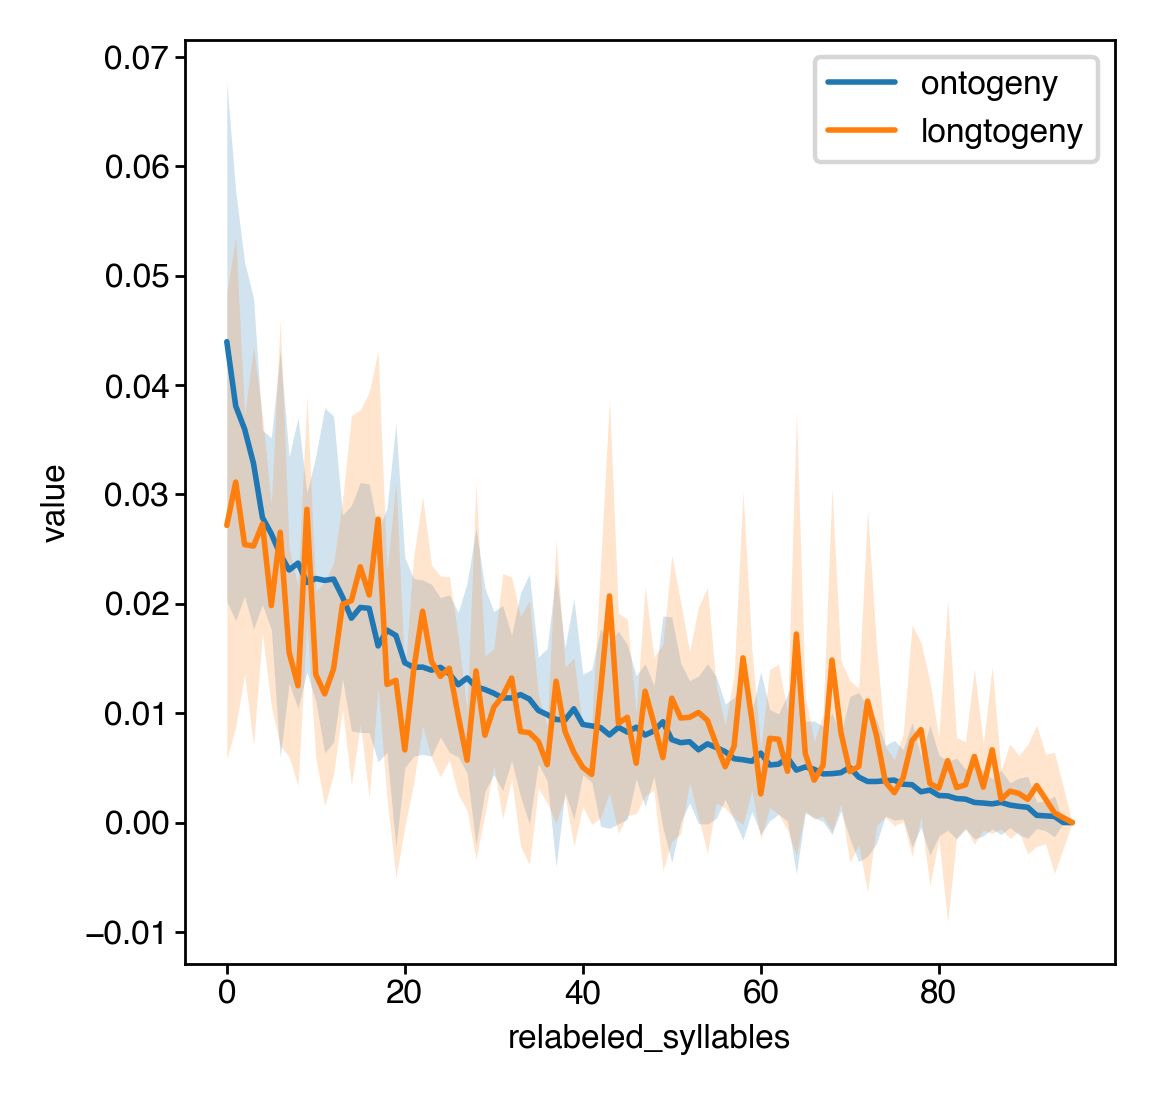

In [12]:
lum = long_usages.melt()
sns.lineplot(
    data=um,
    x="relabeled_syllables",
    y="value",
    errorbar="sd",
    err_kws=dict(lw=0),
    # order=sorted_syllables[::-1],
    label="ontogeny",
)
sns.lineplot(
    data=lum,
    x="relabeled_syllables",
    y="value",
    errorbar="sd",
    err_kws=dict(lw=0),
    # order=sorted_syllables[::-1],
    label="longtogeny",
)

## Try regressions

In [8]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict, LeaveOneGroupOut
from sklearn.pipeline import make_pipeline

In [9]:
y = usages.index.get_level_values('age').values
x = usages

In [10]:
model = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=4)
)

preds = cross_val_predict(model, x, y, groups=y, cv=LeaveOneGroupOut())
r2 = r2_score(y, preds)

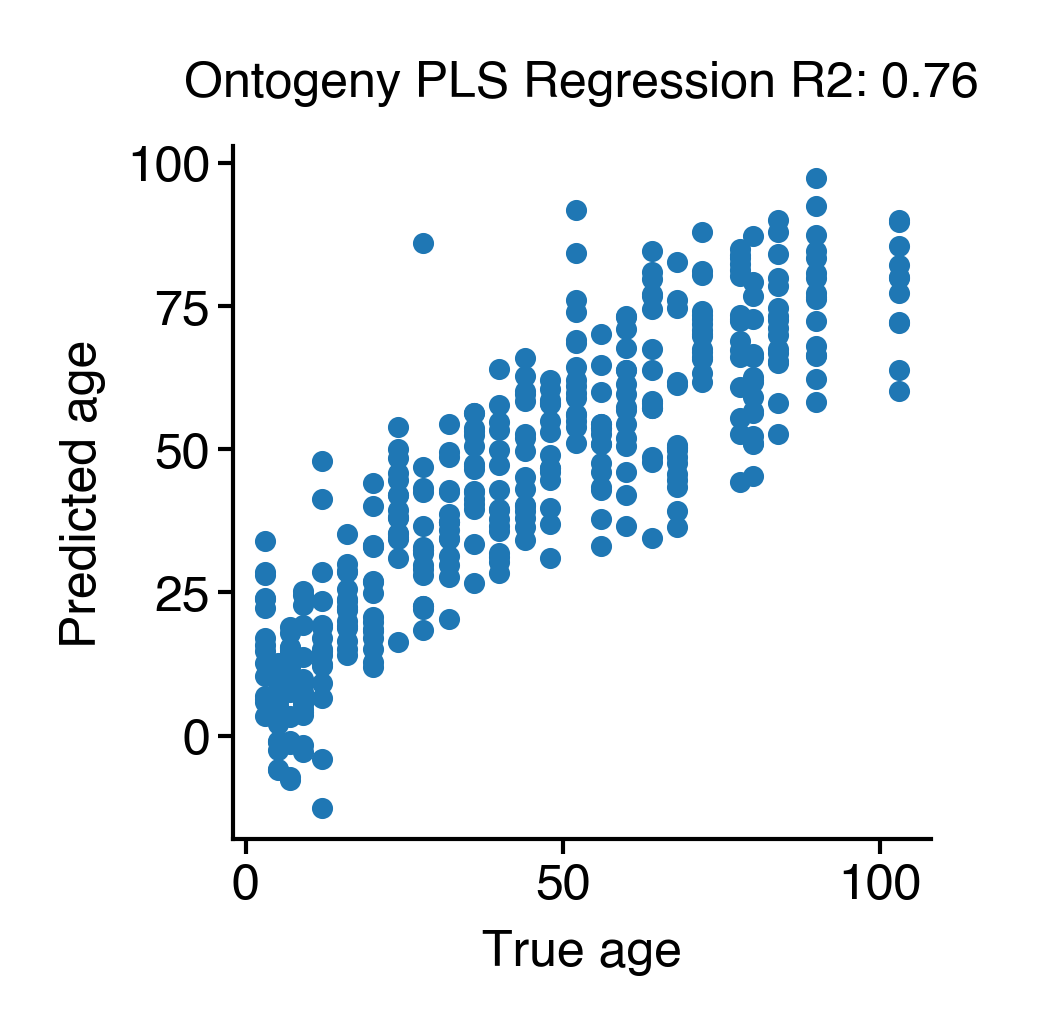

In [16]:
fig = figure(1.5, 1.5)
ax = fig.gca()
ax.scatter(y, preds, s=3)
ax.set(xlabel="True age", ylabel="Predicted age", title=f"Ontogeny PLS Regression R2: {r2:0.2f}")
sns.despine()

In [17]:
test_age = long_usages.index.get_level_values("age") / 7
test_pred = model.fit(x, y).predict(long_usages.reindex(columns=x.columns).fillna(0))
r2 = r2_score(test_age, test_pred)
new_plt_df = pd.DataFrame(
    {
        "age": test_age,
        "pred": test_pred,
        "mouse": long_usages.index.get_level_values("mouse"),
    }
)

In [18]:
# new_plt_df = new_plt_df.query('age < 100')

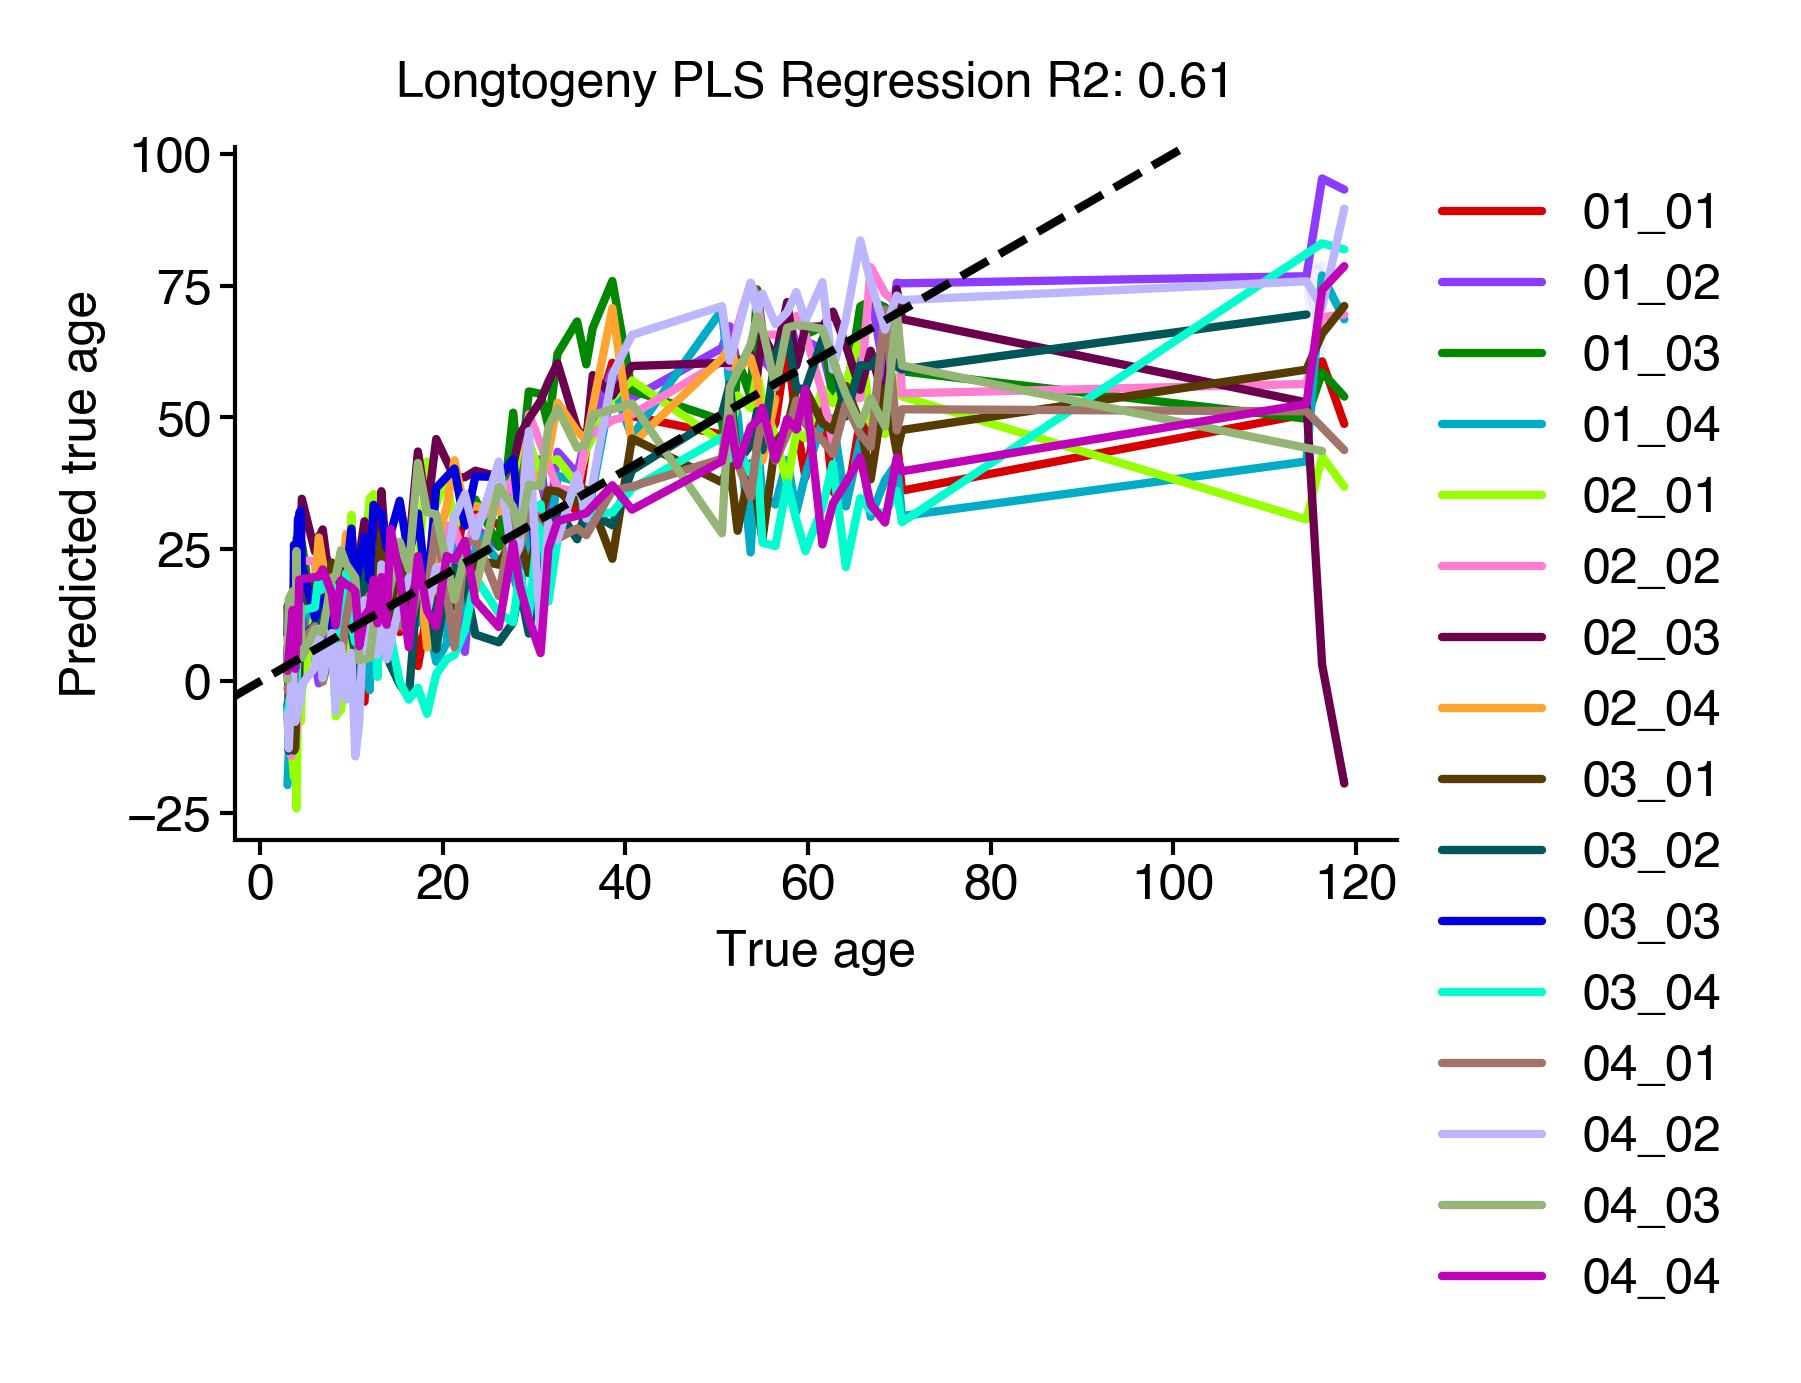

In [19]:
fig = figure(2.5, 1.5)
ax = fig.gca()
ax = sns.lineplot(
    data=new_plt_df,
    x="age",
    y="pred",
    hue="mouse",
    lw=1,
    ax=ax,
    errorbar='se',
    palette=cc.glasbey[: new_plt_df["mouse"].nunique()],
)
ax.set(
    xlabel="True age",
    ylabel="Predicted true age",
    title=f"Longtogeny PLS Regression R2: {r2:0.2f}",
)
dotted_identity(ax)
legend(ax)
sns.despine()

/tmp/ipykernel_13121/3427184406.py:3: UserWarning: The palette list has more values (16) than needed (1), which may not be intended.
  ax = sns.lineplot(


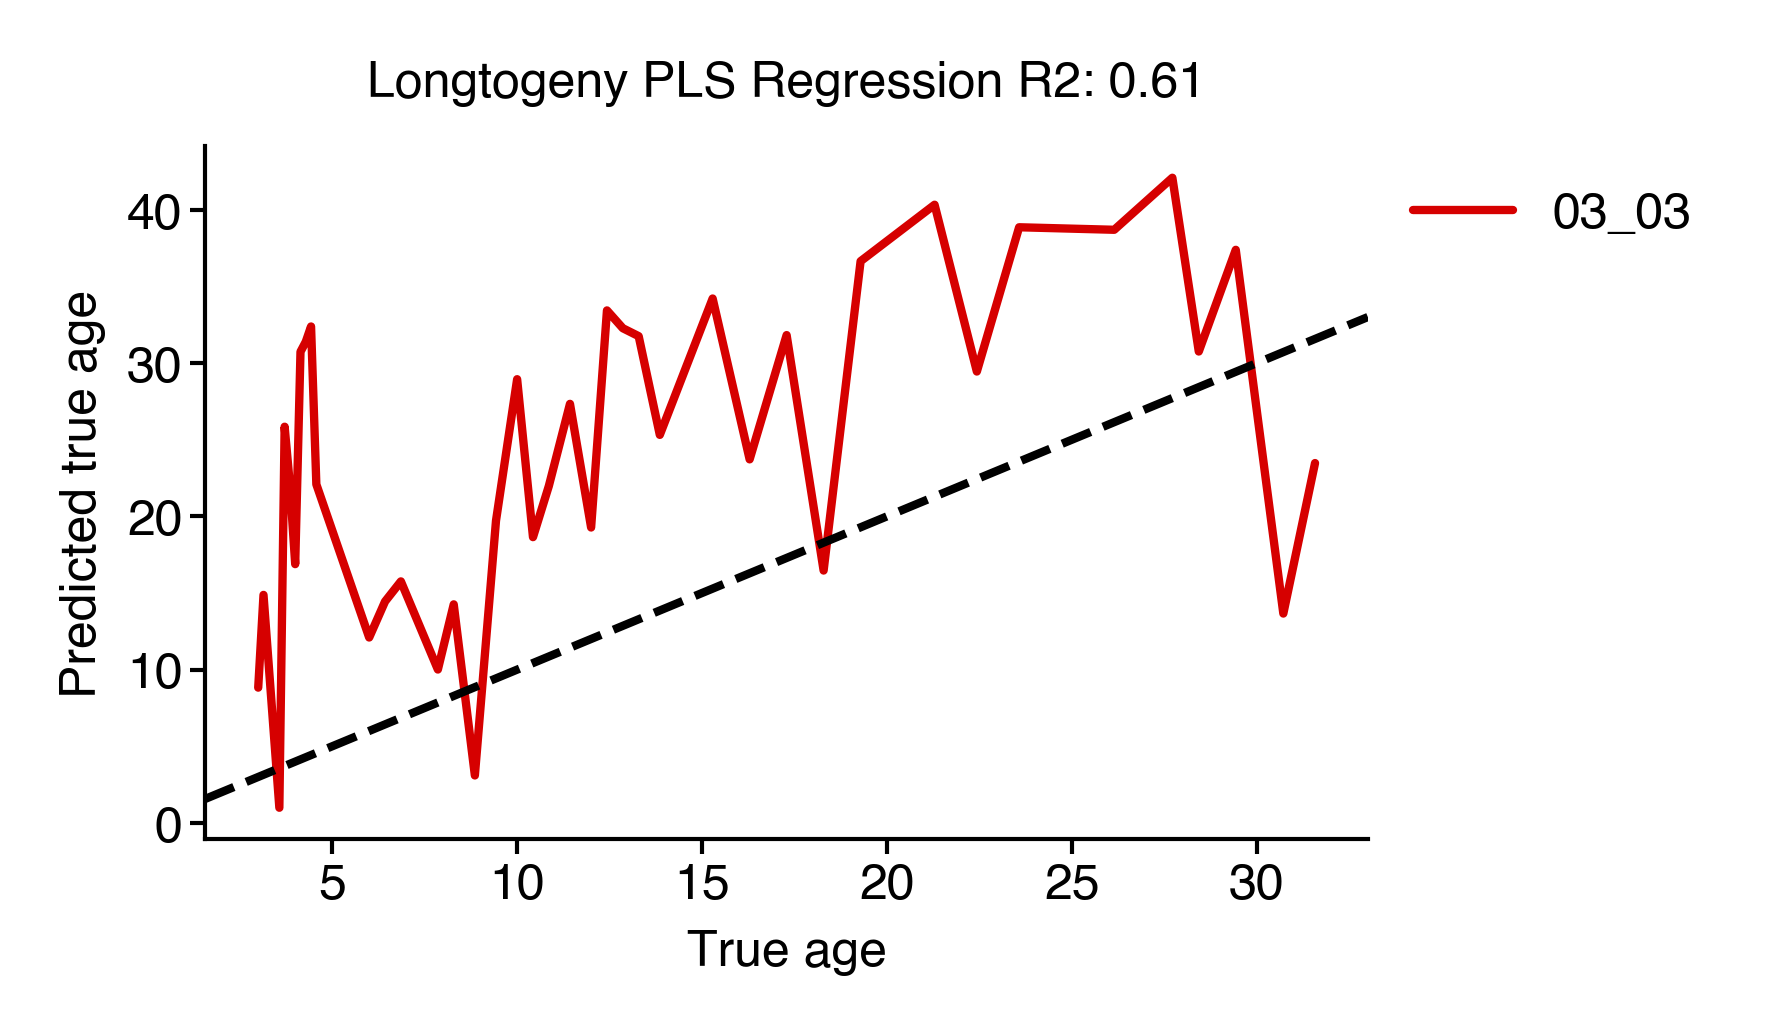

In [20]:
fig = figure(2.5, 1.5)
ax = fig.gca()
ax = sns.lineplot(
    data=new_plt_df,
    x="age",
    y="pred",
    hue="mouse",
    lw=1,
    ax=ax,
    errorbar='se',
    palette=cc.glasbey[: new_plt_df["mouse"].nunique()],
    hue_order=["03_03"],
)
ax.set(
    xlabel="True age",
    ylabel="Predicted true age",
    title=f"Longtogeny PLS Regression R2: {r2:0.2f}",
)
dotted_identity(ax)
legend(ax)
sns.despine()

## Go other direction

In [11]:
long_usages = long_usages[long_usages.index.get_level_values("age")< 500]
pipeline = make_pipeline(StandardScaler(), PLSRegression(n_components=4))
test_age = long_usages.index.get_level_values("age") / 7
bins = pd.qcut(test_age, 30, labels=False)
preds = cross_val_predict(pipeline, long_usages, test_age, cv=LeaveOneGroupOut(), groups=bins, n_jobs=-1)
r2 = r2_score(test_age, preds)
r2

0.8387440523186583

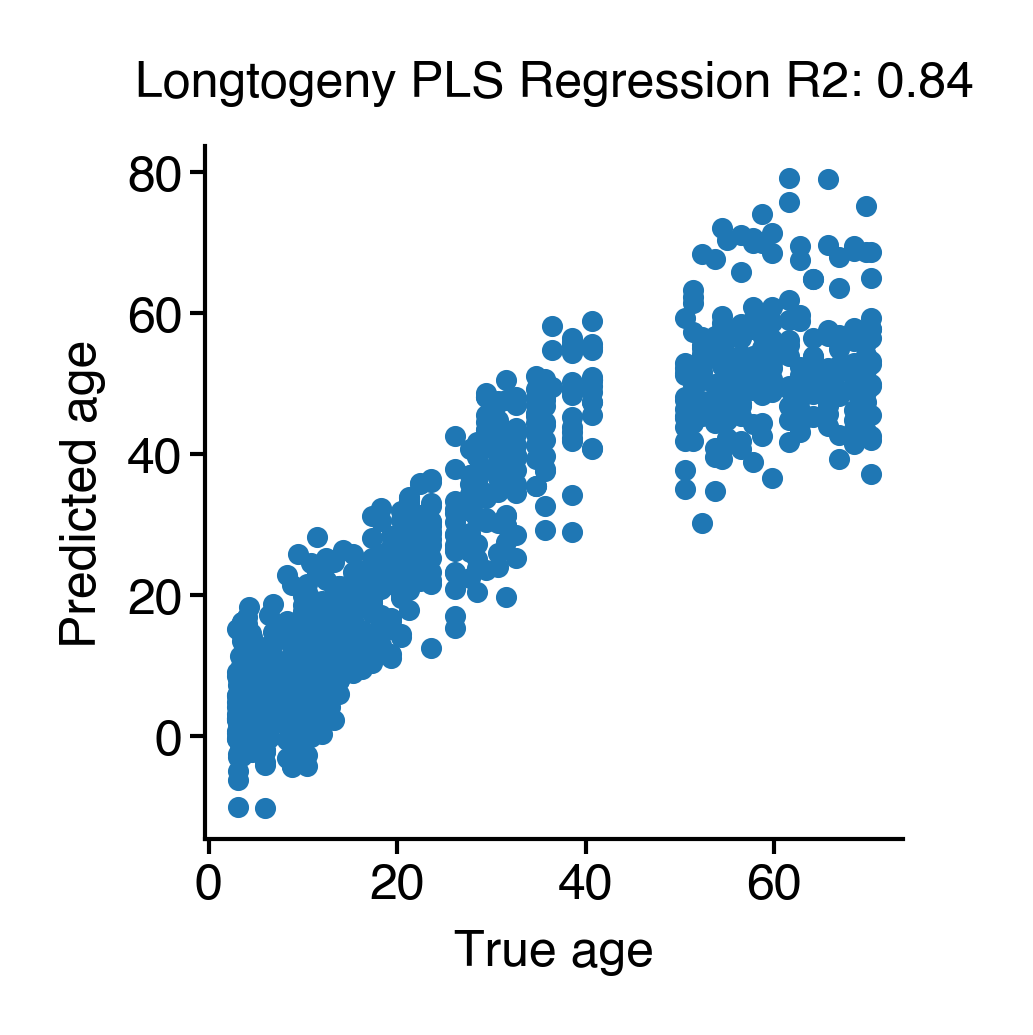

In [12]:
fig = figure(1.5, 1.5)
ax = fig.gca()
ax.scatter(test_age, preds, s=3)
ax.set(
    xlabel="True age",
    ylabel="Predicted age",
    title=f"Longtogeny PLS Regression R2: {r2:0.2f}",
)
sns.despine()

In [23]:
test_pred = pipeline.fit(long_usages, test_age).predict(
    usages.reindex(columns=long_usages.columns).fillna(0)
)
r2 = r2_score(y, test_pred)
new_plt_df = pd.DataFrame({"age": y, "pred": test_pred})

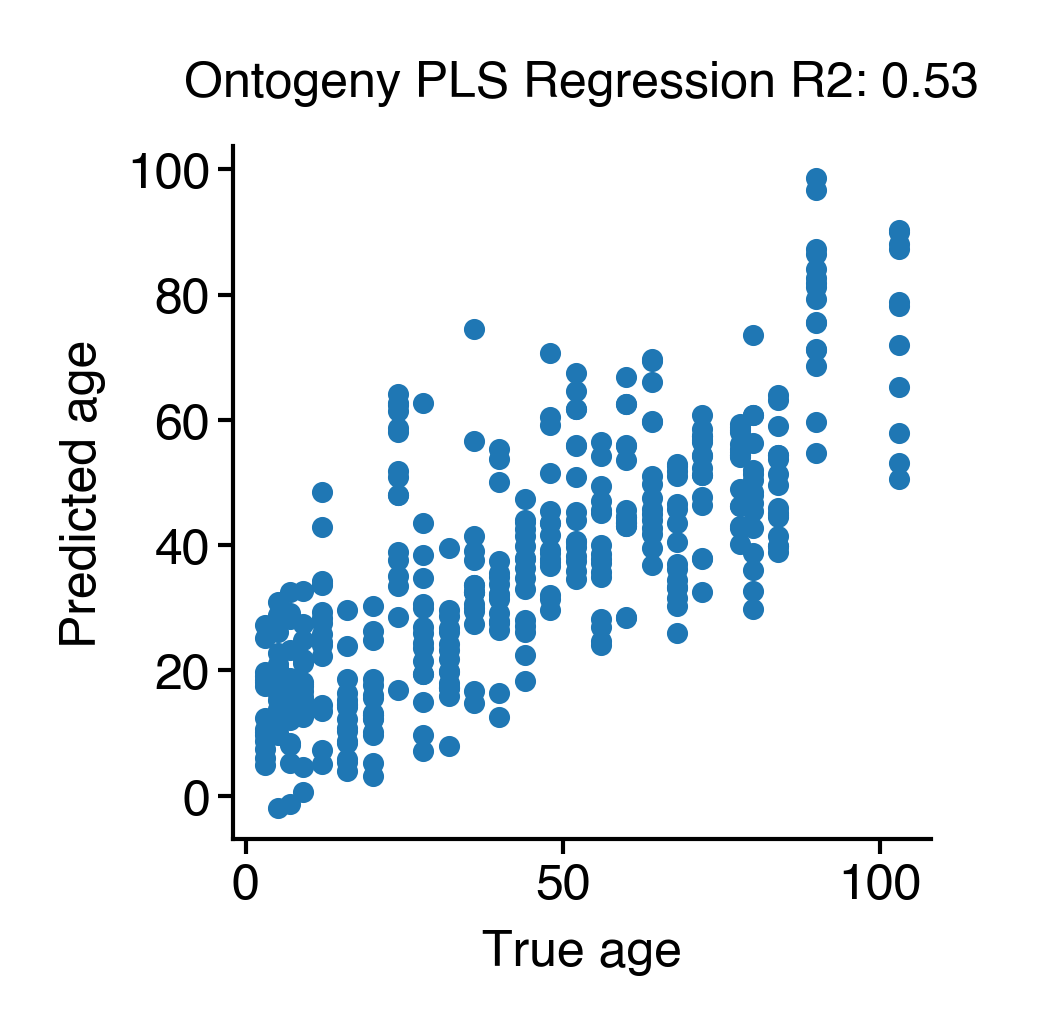

In [24]:
fig = figure(1.5, 1.5)
ax = fig.gca()
ax.scatter(y, test_pred, s=3)
ax.set(
    xlabel="True age",
    ylabel="Predicted age",
    title=f"Ontogeny PLS Regression R2: {r2:0.2f}",
)
sns.despine()

## Long v2

In [25]:
long_usages = pd.read_parquet(folder / "longv2_males_clean_v2.parquet").fillna(0).astype('float32')
long_usages

relabeled_syllables                                                   0.0   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.000450   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.000491   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.000000   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.001427   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.000861   
...                                                                    ...   
150 M4_04 M4   fc7448ed-29d1-4040-aae6-ca50f5a00e4c M4_04_68      0.019125   
    M5_01 M5   2e710fde-bad1-4814-a17a-ce13725d3d28 M5_01_68      0.013873   
    M5_02 M5   6dc9647f-7185-4c53-8ea4-beb090e4bfd1 M5_02_68      0.035435   
    M5_03 M5   bbb9d8fa-2f35-466b-9317-d7290d20333d M5_03_68      0.027176   
    M5_04 M5   2d7a82b9-e8c1-44d1-a0df-97b299f5fe7d M5_04_68      0.023678   

relabeled_syllables                                                   1.0   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.008108   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.007360   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.009425   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.010942   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.011197   
...                                                                    ...   
150 M4_04 M4   fc7448ed-29d1-4040-aae6-ca50f5a00e4c M4_04_68      0.028899   
    M5_01 M5   2e710fde-bad1-4814-a17a-ce13725d3d28 M5_01_68      0.008999   
    M5_02 M5   6dc9647f-7185-4c53-8ea4-beb090e4bfd1 M5_02_68      0.007829   
    M5_03 M5   bbb9d8fa-2f35-466b-9317-d7290d20333d M5_03_68      0.036629   
    M5_04 M5   2d7a82b9-e8c1-44d1-a0df-97b299f5fe7d M5_04_68      0.013023   

relabeled_syllables                                                   2.0   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.009459   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.009814   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.011310   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.019505   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.015073   
...                                                                    ...   
150 M4_04 M4   fc7448ed-29d1-4040-aae6-ca50f5a00e4c M4_04_68      0.050999   
    M5_01 M5   2e710fde-bad1-4814-a17a-ce13725d3d28 M5_01_68      0.028121   
    M5_02 M5   6dc9647f-7185-4c53-8ea4-beb090e4bfd1 M5_02_68      0.046148   
    M5_03 M5   bbb9d8fa-2f35-466b-9317-d7290d20333d M5_03_68      0.022450   
    M5_04 M5   2d7a82b9-e8c1-44d1-a0df-97b299f5fe7d M5_04_68      0.035122   

relabeled_syllables                                                   3.0   \
age mouse cage uuid                                 subject_name             
24  M1_01 M1   3ad71c75-8590-4bd2-9558-bb65df5e493a M1_01_01      0.001802   
    M1_02 M1   54a74db2-647e-494e-9ea1-9617d64d6332 M1_02_01      0.000491   
    M1_03 M1   3f9c1890-2bc6-4c0f-8605-d8e509358582 M1_03_01      0.003299   
    M1_04 M1   e21651b7-47e9-4e9f-b891-a838ce12d5cf M1_04_01      0.003806   
    M2_01 M2   d10914be-cb7a-4759-bbc6-78eea3959f7c M2_01_01      0.008183   
...                                                                    ...   
150 M4_04 M4   fc7448ed-29d1-4040-aae6-ca50f5a00e4c M4_04_68      0.008500   
    M5_01 M5   2e710fde-bad1-4814-a17a-ce13725d3d28 M5_01_68      0.022122   
    M5_02 M5   6dc9647f-7185-4c53-8ea4-beb090e4bfd1 M5_02_68      0.016069   
    M5_03 M5   bbb9d8fa-2f35-466b-9317-d7290d20333d M5_03_68      0.009453   
    M5_04 M5   2d7a

In [26]:
model = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components=4)
)

preds = cross_val_predict(model, x, y, groups=y, cv=LeaveOneGroupOut())
r2 = r2_score(y, preds)

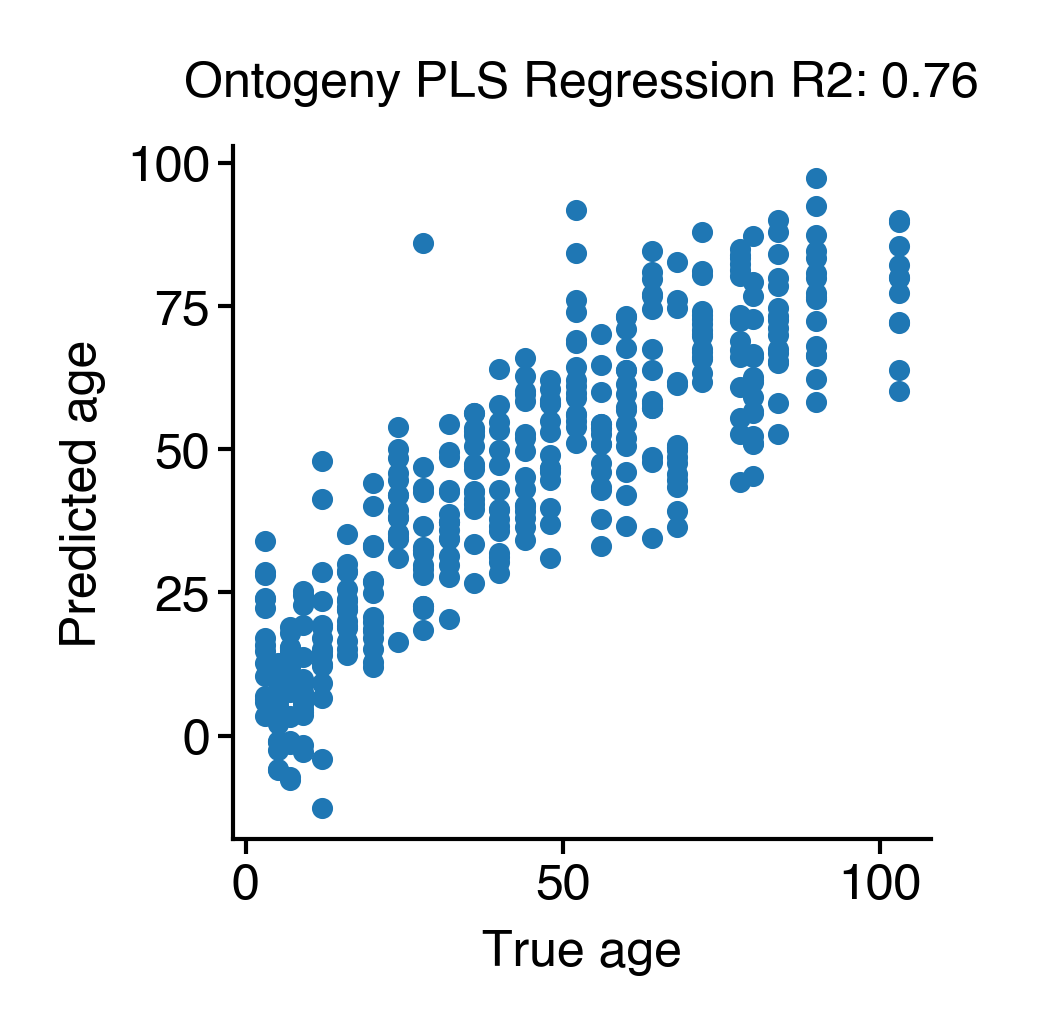

In [27]:
fig = figure(1.5, 1.5)
ax = fig.gca()
ax.scatter(y, preds, s=3)
ax.set(xlabel="True age", ylabel="Predicted age", title=f"Ontogeny PLS Regression R2: {r2:0.2f}")
sns.despine()

In [28]:
test_age = long_usages.index.get_level_values("age") / 7
test_pred = model.fit(x, y).predict(long_usages.reindex(columns=x.columns).fillna(0))
r2 = r2_score(test_age, test_pred)
new_plt_df = pd.DataFrame(
    {
        "age": test_age,
        "pred": test_pred,
        "mouse": long_usages.index.get_level_values("mouse"),
    }
)

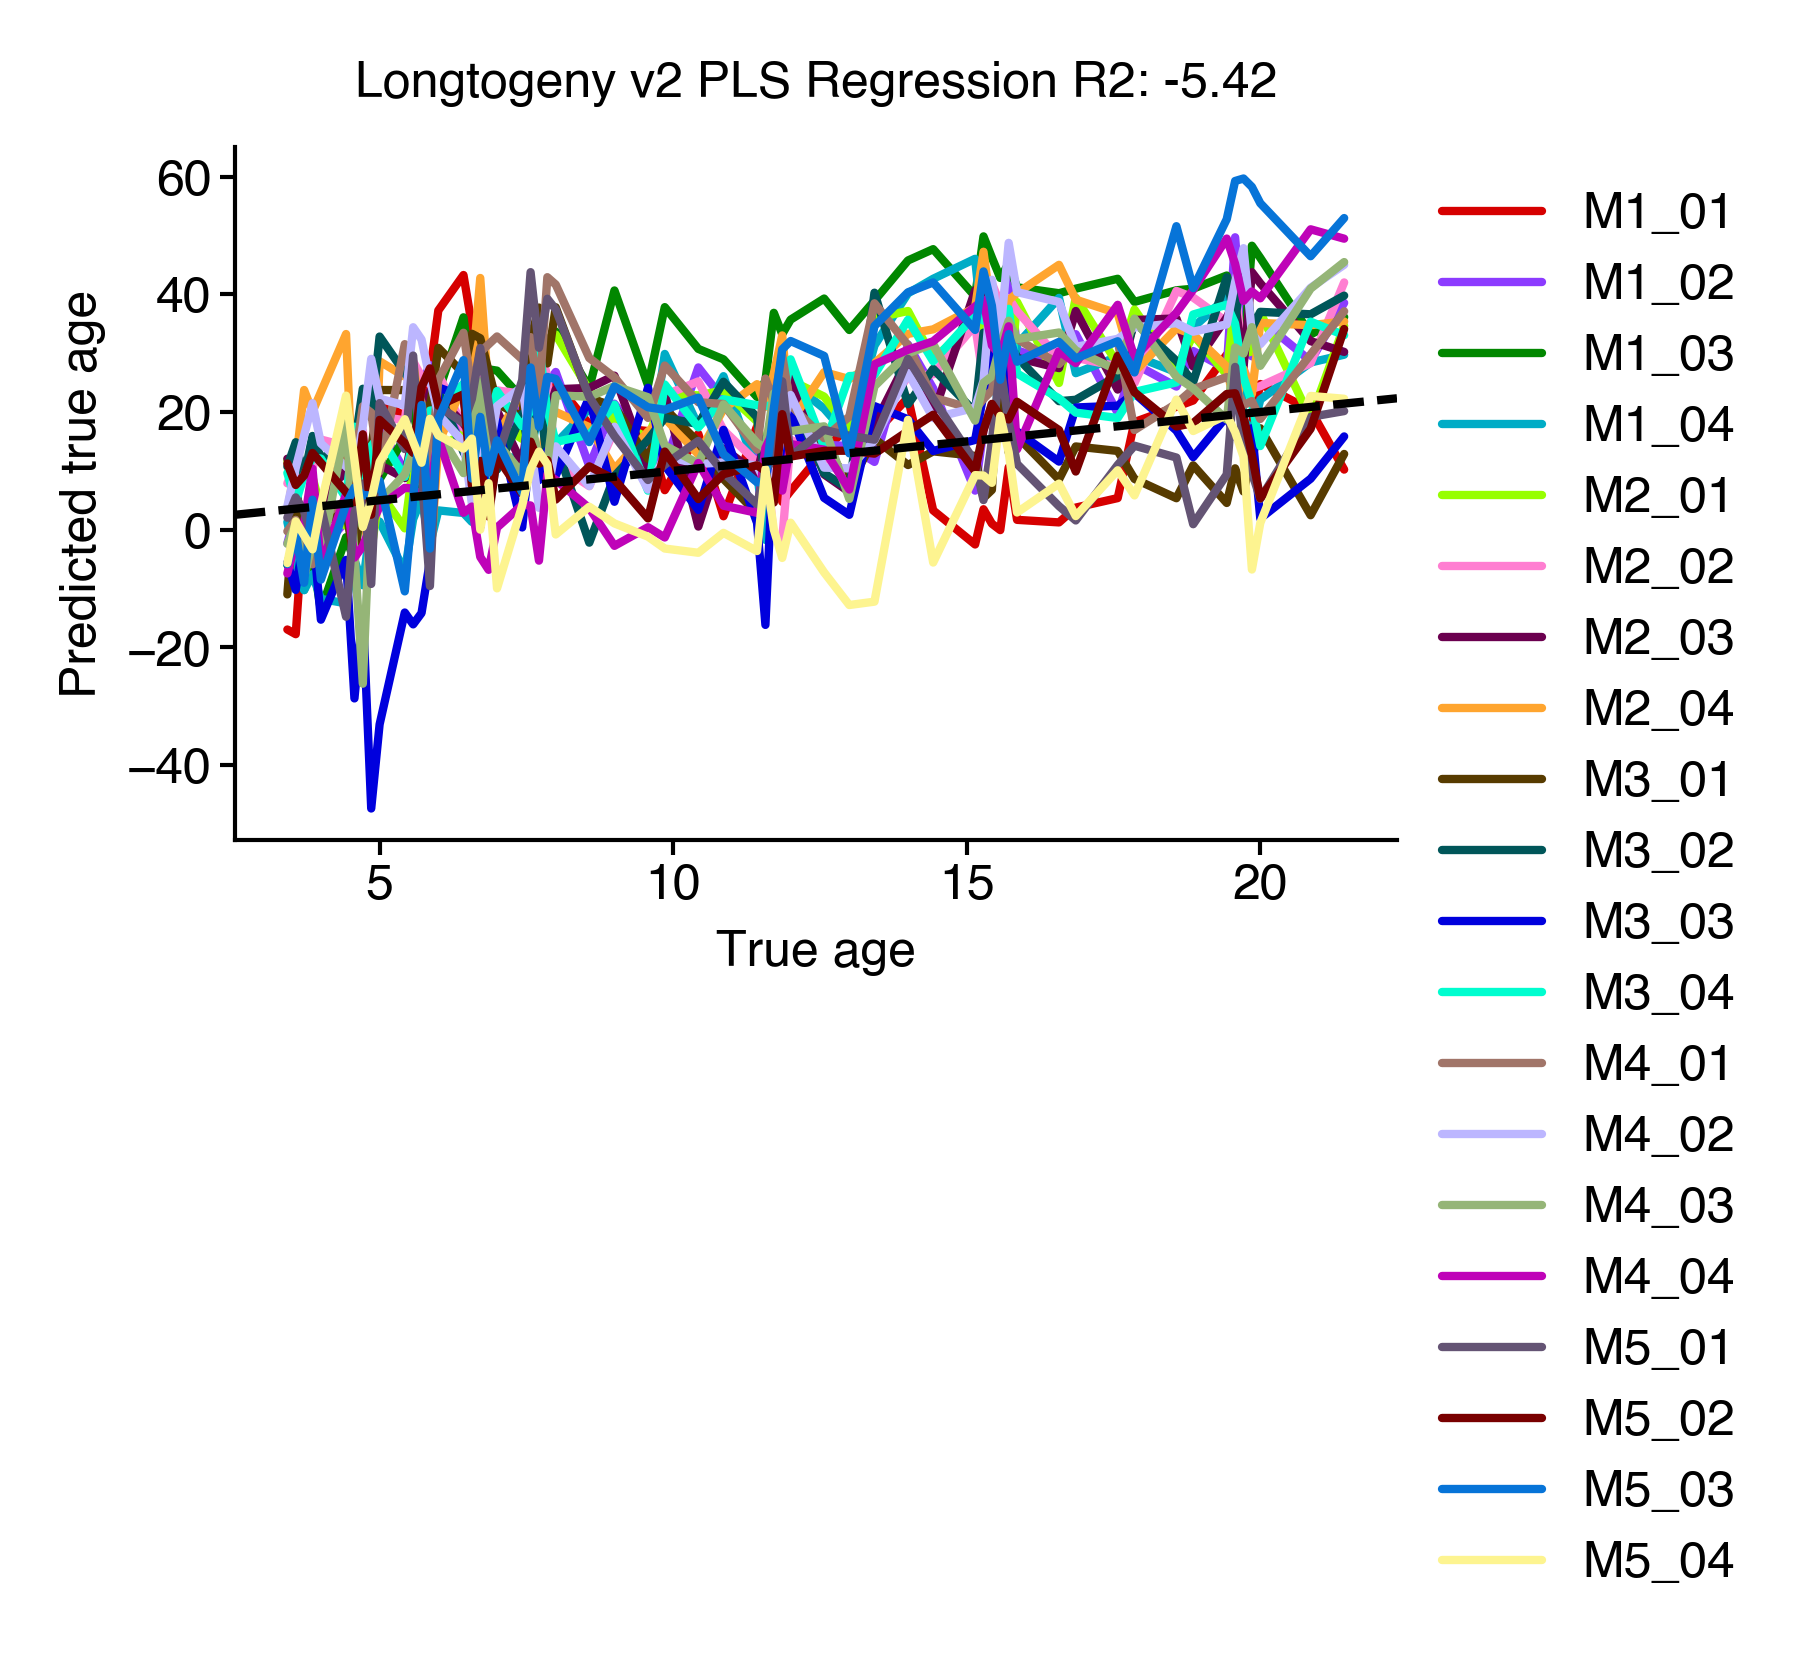

In [29]:
fig = figure(2.5, 1.5)
ax = fig.gca()
ax = sns.lineplot(
    data=new_plt_df,
    x="age",
    y="pred",
    hue="mouse",
    lw=1,
    ax=ax,
    errorbar='se',
    palette=cc.glasbey[: new_plt_df["mouse"].nunique()],
)
ax.set(
    xlabel="True age",
    ylabel="Predicted true age",
    title=f"Longtogeny v2 PLS Regression R2: {r2:0.2f}",
)
dotted_identity(ax)
legend(ax)
sns.despine()